<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Logo_UTFSM.png" width="200" alt="utfsm-logo" align="left"/>

# MAT281
### Aplicaciones de la Matemática en la Ingeniería

## Proyecto Final

__Nombre__: Sofía Guarello A.

__Rol__: 201511014-k

## Adult Data Set

Abstract: Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.

El conjunto de datos fue extraído de la base de datos de un censo que se puede encontrar en http://www.census.gov/ftp/pub/DES/www/welcome.html. 

### Objetivo

El objetivo es a partir de los datos de un censo, hacer la mejor predicción de si una persona gana más de $50K en un año. Para ello es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento. Sin embargo, se busca escoger el mejor modelo de clasificación con una métrica específica.

* Se solicita ajustar tres modelos de clasificación, una regresión logística, KNN y un tercero a elección del siguiente [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) (es obligación escoger un _estimator_ que tenga por lo menos un hiperparámetro). 
* En los modelos que posean hiperparámetros es mandatorio buscar el/los mejores con alguna técnica disponible en `scikit-learn` ([ver más](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)).
* Para cada modelo, se debe realizar _Cross Validation_ con 5 _folds_ utilizando los datos de entrenamiento con tal de determinar un intervalo de confianza para el _score_ del modelo.
* Finalmente, realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_. 

En este informe __siempre__ debes escoger un _score_ / _scoring_, tanto para el _Cross Validation_, _Hyper Parameter Tuning_ y _Prediction_. Toda la información al respecto de las métricas se encuentra [aquí](https://scikit-learn.org/stable/modules/model_evaluation.html#metrics-and-scoring-quantifying-the-quality-of-predictions). 

### Evaluación

Este jupyter notebook debe ser autocontenido, considera que es un informe técnico donde debes detallar cada paso, comentando código, utilizando variables con nombres adecuados, realizando gráficos y agregando apreciaciones personales cuando sea necesario. __No escatimes recursos a la hora de escribir.__

__Escenario:__ Te encuentras trabajando como _data scientist / data analyst / machine learning engineer / etc._ y este trabajo será presentado al resto del equipo, en especial a tu jefe directo. Todos tienen conocimiento del problema y de machine learning, por lo que no puedes pasar por alto los aspectos técnicos de tu desarrollo. __Al final del informe, debes entregar tus conclusiones, visualizaciones y apreciaciones personales.__

__Preguntas a responder:__

* ¿Cuál modelo tiene mejor _score_?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?
* ¿Por qué utilizar ese _score_ y no otro?


### Rúbrica

* __Estadística Descriptiva__ (15 pts)
* __Visualización__ (20 pts)
* __Preprocesamineto__ (5 pts)
* __Regresión Logística__ (10 pts)
* __K Nearest Neighbours__ (10 pts)
* __Modelo a elección__ (10 pts)
* __Selección de Modelos__ (20 pts)
* __Conclusiones__ (10 pts)

## Contenidos

* [Estadística Descriptiva](#descr_stat)
* [Visualización](#visualization)
* [Preprocesamineto](#preprocessing)
* [Regresión Logística](#logistic)
* [K Nearest Neighbours](#knn)
* [Modelo a elección](#free-style)
* [Selección de Modelos](#model-selection)
* [Conclusiones](#conclusions)

In [4]:
import os
import numpy as np
import pandas as pd

In [5]:
df_train = pd.read_csv(
    os.path.join("data", "adult.data"),
    header=None,
    names=[
        "age",
        "workclass",
        "fnlwgt",
        "education",
        "education-num",
        "marital-status",
        "occupation",
        "relationship",
        "race",
        "sex",
        "capital-gain",
        "capital-loss",
        "hours-per-week",
        "native-country",
        "target"
    ]
)
df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df_test = pd.read_csv(
    os.path.join("data", "adult.test"),
    header=None,
    names=[
        "age",
        "workclass",
        "fnlwgt",
        "education",
        "education-num",
        "marital-status",
        "occupation",
        "relationship",
        "race",
        "sex",
        "capital-gain",
        "capital-loss",
        "hours-per-week",
        "native-country",
        "target"
    ],
    skiprows=1
)
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


Ahora se concatenan ambos conjuntos de datos.

In [7]:
df = pd.concat([df_train, df_test], ignore_index=True)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<a id='descr_stat'></a>

## Estadística Descriptiva

* Definir las variables a trabajar
* Resumen de estadísticas (promedio, varianza, min, etc.)
* Cantidad de datos nulos
* Info (dtypes y ram)
* Outliers
* Análisis de la variable target (balance, conteos, etc.)

**Variables a trabajar**
- age
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt (final weight): The weights are controlled to independent estimates of the civilian noninstitutional population of the US. People with similar demographic characteristics should have similar weights.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: Each type of education has an education number.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain
- capital-loss
- hours-per-week: number of hours worked per week.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- target: Income clasified by <=50K or >50K.

**Resumen de estadisticas de los datos numéricos del data frame:**  

In [8]:
df.describe(include="all").T.fillna("")

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,48842.0,,,,38.6436,13.7105,17,28,37,48,90
workclass,48842.0,9,Private,33906,,,,,,,
fnlwgt,48842.0,,,,189664,105604,12285,117550,178144,237642,1.4904e+06
education,48842.0,16,HS-grad,15784,,,,,,,
education-num,48842.0,,,,10.0781,2.57097,1,9,10,12,16
marital-status,48842.0,7,Married-civ-spouse,22379,,,,,,,
occupation,48842.0,15,Prof-specialty,6172,,,,,,,
relationship,48842.0,6,Husband,19716,,,,,,,
race,48842.0,5,White,41762,,,,,,,
sex,48842.0,2,Male,32650,,,,,,,


<a id='visualization'></a>

 **Observación:** En capital-gain y capital-loss la mayoría de los datos toman el valor de 0 y el resto toma un valor mucho mayor a 0 es por esto que la desviación estandar es tan alta. 

In [9]:
df['capital-gain'].value_counts()

0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
2387         1
22040        1
6612         1
1111         1
1639         1
Name: capital-gain, Length: 123, dtype: int64

In [10]:
df['capital-loss'].value_counts()

0       46560
1902      304
1977      253
1887      233
2415       72
        ...  
1539        1
2489        1
2201        1
1421        1
1870        1
Name: capital-loss, Length: 99, dtype: int64

**Cantidad de datos que hay en cada columna y el tipo de datos:**

In [11]:
df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  target          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


**Observación**: Con lo anterior es fácil ver que ninguna columna tiene datos nulos pues la cantidad de datos no nulos que tienen es igual a la cantidad de datos totales.

**Análisis de la variable target:** Columna "target" que representa el ingreso <=50K o >50K.

In [12]:
df['target'].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

Notemos que se tienen dos etiquetas distintas para una misma clasificación.

In [13]:
fix_target_dict = {" <=50K.": " <=50K", " >50K.":" >50K"}
df = df.assign(target=lambda x: x["target"].map(fix_target_dict).fillna(x["target"]))

In [14]:
df['target'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [15]:
df['target'].value_counts() 

 <=50K    37155
 >50K     11687
Name: target, dtype: int64

**Observación:**
- La suma de ambos es 48842, equivalente al total de datos, por lo que ningun dato es nulo.
- La mayoría de los ingresos son menores o iguales a 50K.

**Pequeño preprocesamiento:** Para facilitar el ánalisis de la variable target, le cambiaremos al valor a 0 si el ingreso es <=50K y 1 si el ingreso es >50K. Ademas crearemos un nuevo data frame llamado df_numeric que contiene solo las columnas con valores numéricos.

In [16]:
df=df.replace({' <=50K':'0', ' >50K':'1'})
df['target'].unique()

array(['0', '1'], dtype=object)

In [17]:
df=df.astype({'target': 'int64'})

In [18]:
df_numeric=df.select_dtypes("int64")
df_numeric=df_numeric.rename({"target":"Income"},axis=1)
df_numeric.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0


## Visualización

* Para cada variable, histogramas y boxplots
* Scatter matrix
* Grafica interactiva interesante

Puedes utilizar `matplotlib` o `altair`, como sea de tu preferencia.

In [19]:
import altair as alt
import matplotlib.pyplot as plt
from vega_datasets import data

alt.themes.enable("opaque")

%matplotlib inline

In [20]:
dict_columns={"age":"Age","fnlwgt":"Final Weight","education-num":"Education Number","capital-gain":"Capital Gain","capital-loss":"Capital Loss","hours-per-week":"Hours per Week"}

In [21]:
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

**Histograma**

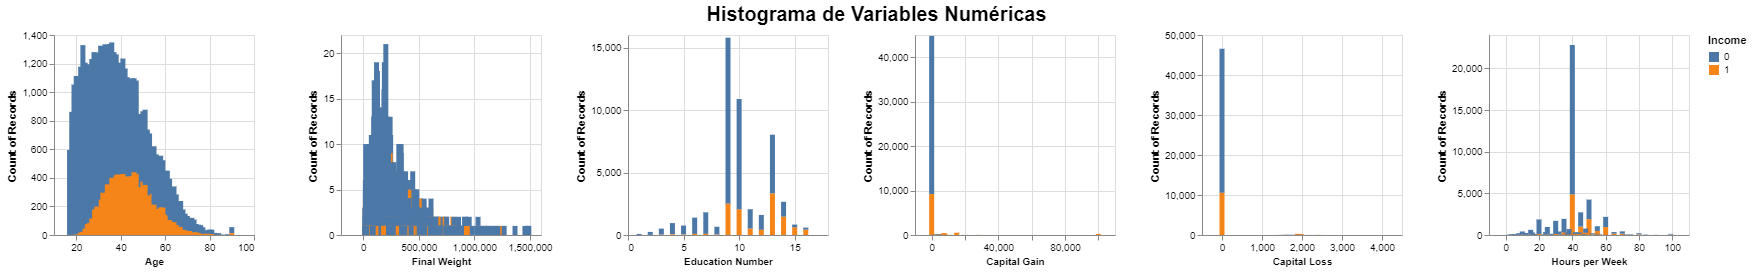

In [22]:
alt.Chart(df_numeric.rename(dict_columns,axis=1)).mark_bar().encode(
    x=alt.X(alt.repeat('column'),type='quantitative',axis=alt.Axis(titleFontSize=10)),
    y='count()',
    color=alt.Color("Income:N")
).properties(
    height=200,
    width=200
).repeat(
    column=list(dict_columns.values()),
    title=alt.TitleParams(text='Histograma de Variables Numéricas', align='center', anchor='middle',fontSize=20)
)
#hacer 2do grafico solo

**Scatter Matrix**

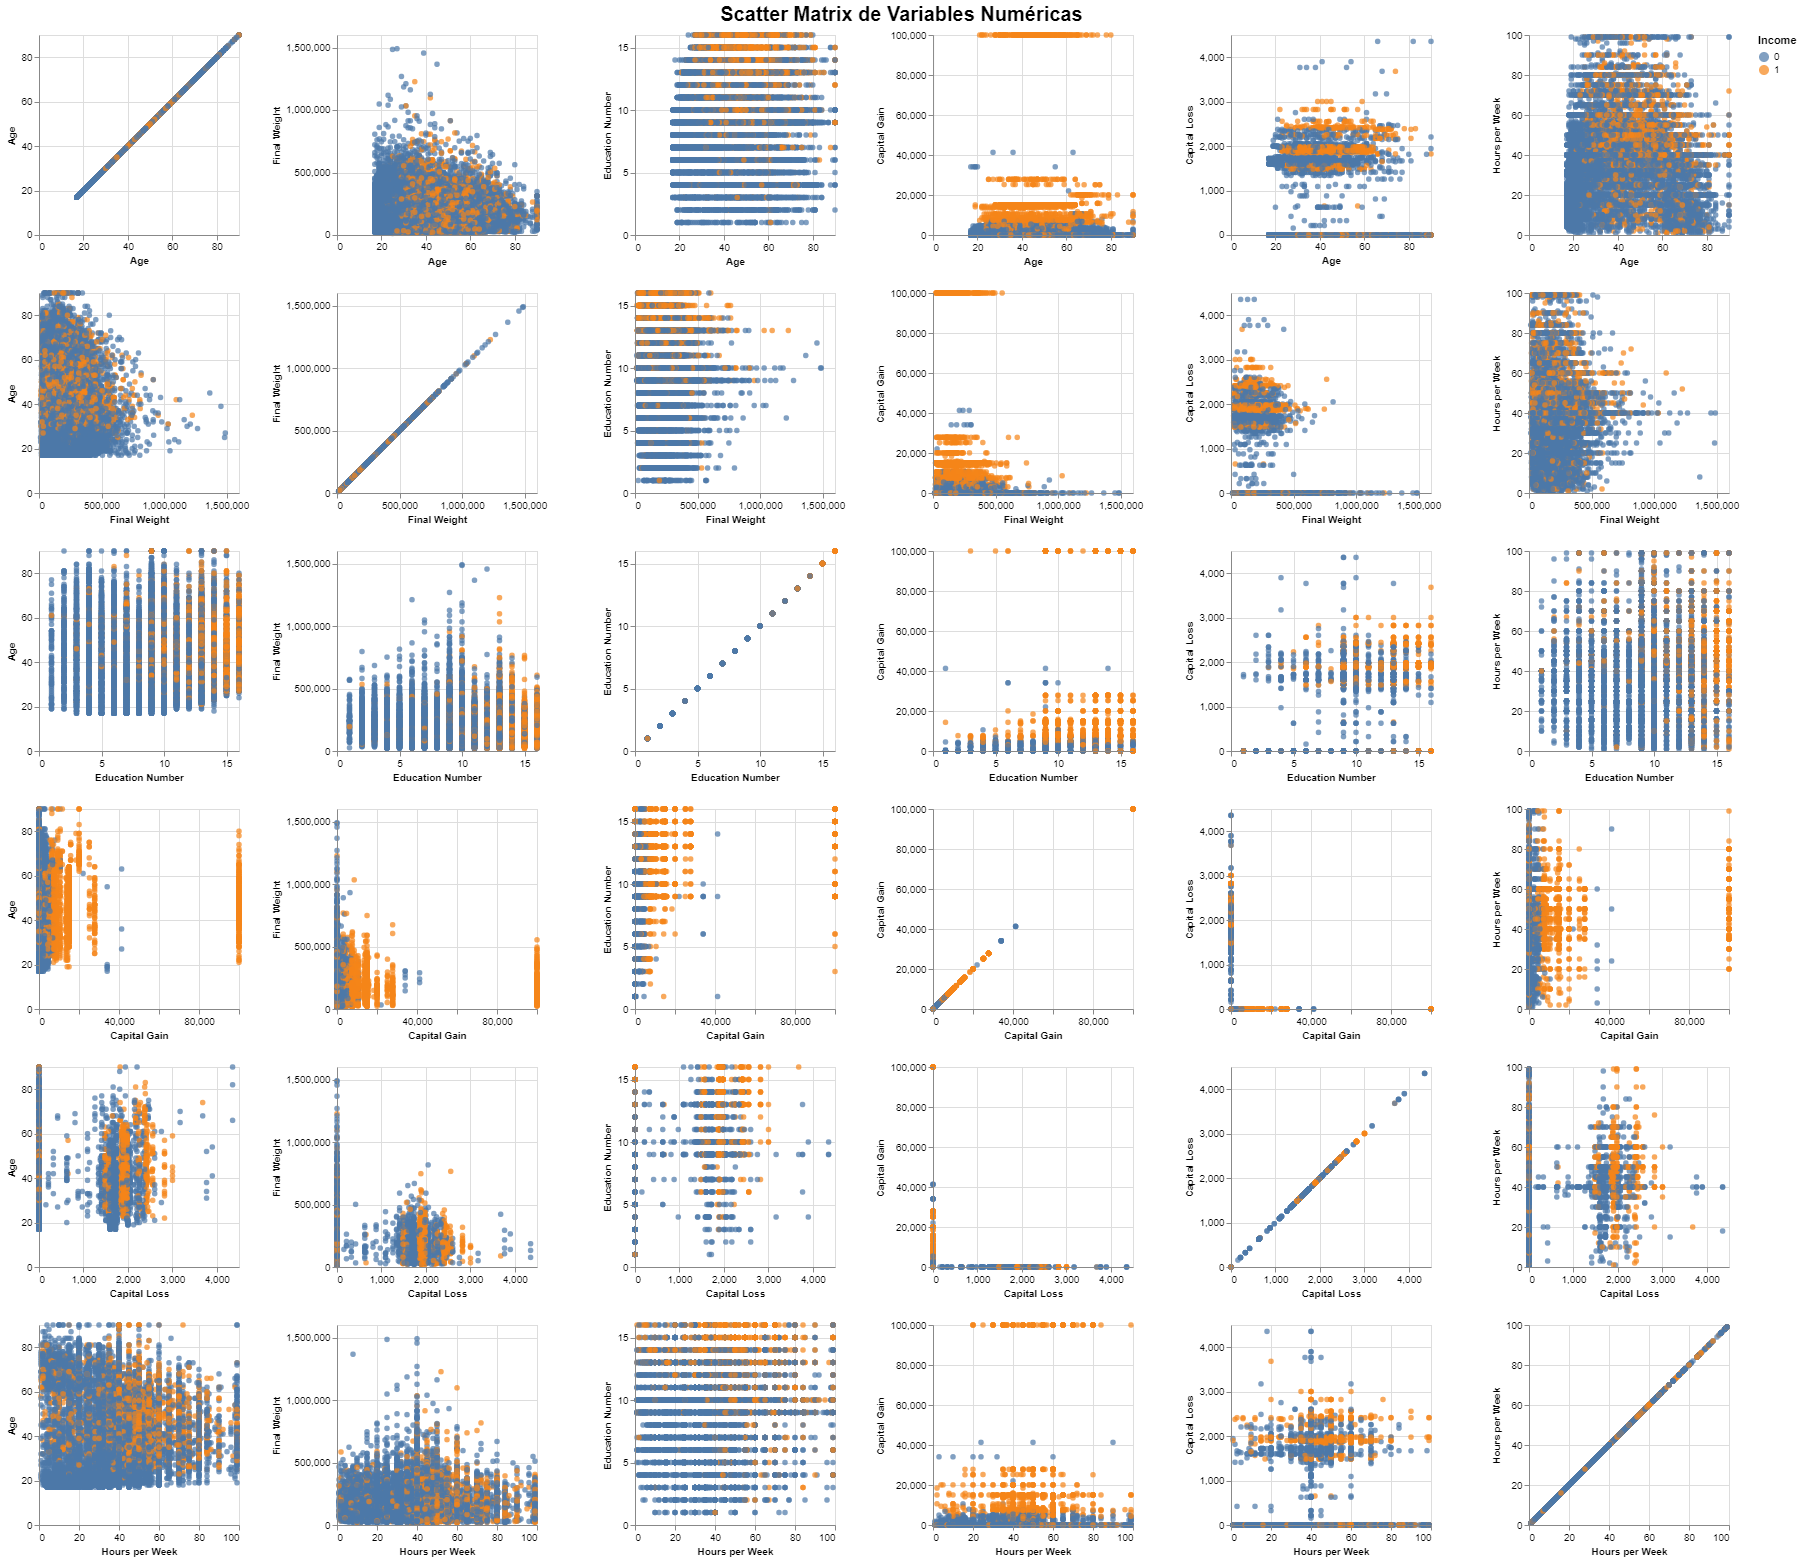

In [23]:
alt.Chart(df_numeric.rename(dict_columns,axis=1)).mark_circle().encode(
    x=alt.X(alt.repeat('row'),type='quantitative',axis=alt.Axis(titleFontSize=10)),
    y=alt.Y(alt.repeat('column'), type='quantitative',axis=alt.Axis(titleFontSize=10)),
    color=alt.Color("Income:N")
).properties(
    height=200,
    width=200
).repeat(
    column=list(dict_columns.values()),
    row=list(dict_columns.values()),
    title=alt.TitleParams(text='Scatter Matrix de Variables Numéricas', align='center', anchor='middle',fontSize=20)
)

**Gráfica Interactiva** 

<a id='preprocessing'></a>

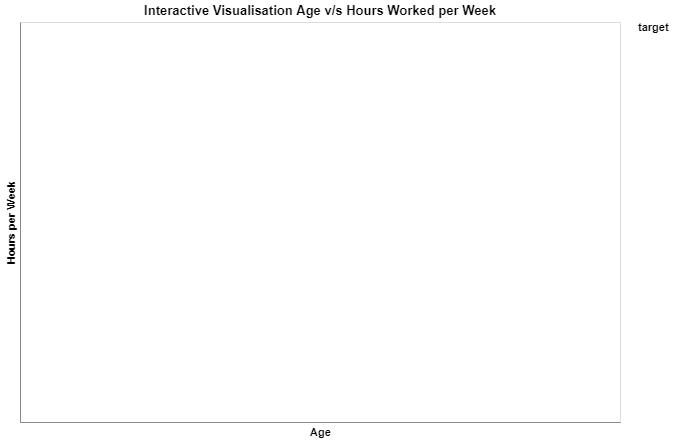

In [24]:
selection = alt.selection_single();
alt.Chart(df).mark_point(filled=False).encode(
    alt.X('age:Q', title = "Age",scale=alt.Scale(zero=False)),
    alt.Y('hours-per-week:Q', title= "Hours per Week",scale=alt.Scale(zero=False)),
    tooltip = [alt.Tooltip('age:Q'),
                alt.Tooltip('sex'),
               alt.Tooltip('race'),
               alt.Tooltip('occupation:N'),
               alt.Tooltip('hours-per-week:Q')
              ],
    color=alt.condition(selection, 'target:N',  alt.value('grey'))
).add_selection(selection).properties(
    title='Interactive Visualisation Age v/s Hours Worked per Week',
    width=600,
    height=400
)

In [25]:
df_interactive=df[["age","hours-per-week","target"]].groupby(["age","target"]).mean().reset_index()
df_interactive = df_interactive.replace({0:'<=50K', 1:'>50K'})
df_interactive=df_interactive.rename({"target":"Income","age":"Age","hours-per-week":"Hours per Week"},axis=1)
df_interactive.head()

,Age,Income,Hours per Week
0,17,<=50K,21.137815
1,18,<=50K,25.745940
2,19,<=50K,30.533333
3,19,>50K,40.000000
4,20,<=50K,32.429856


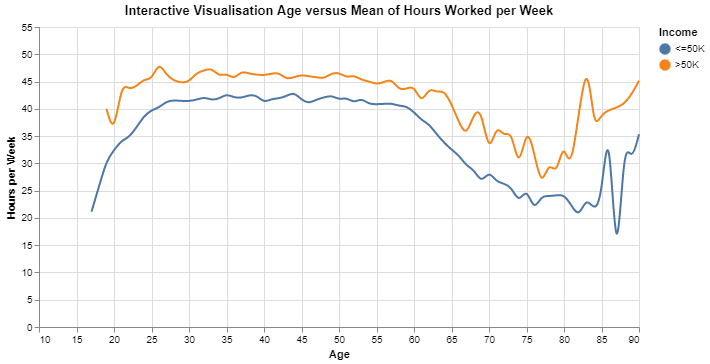

In [26]:
# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['age'], empty='none')

# The basic line
line = alt.Chart(df_interactive).mark_line(interpolate='basis').encode(
    x='Age:Q',
    y='Hours per Week:Q',
    color='Income:N'
)

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart(df_interactive).mark_point().encode(
    x='Age:Q',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'Hours per Week:Q', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(df_interactive).mark_rule(color='gray').encode(
    x='Age:Q',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(
    line, selectors, points, rules, text
).properties(
    title="Interactive Visualisation Age versus Mean of Hours Worked per Week",
    width=600, height=300
)

## Preprocesamiento

Es hora de preparar los datos para la selección de modelos. Se solicita que:

* Crear los _numpy.array_ `X_train` y `X_test` utilizando los dataframes `df_train` y `df_test` respectivamente. 
    - Solo utiliza las columnas numéricas (según el archivo `data/adult.names`).
    - En esta parte es probable que debas transformar columnas utilizando `astype`.
    - Hint: Luego de la transformación puedes usar el método `select_dtypes()`.
* De la misma manera define los _numpy.array_ `y_train` e `y_test` utilizando la columna `target` de los dataframe `df_train` y `df_test` respectivamente.

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [28]:
df_numeric.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0


In [30]:
X_train, X_test, y_train, y_test= train_test_split(df_numeric.drop(columns="Income"),df_numeric["Income"],test_size=0.2, random_state = 42)
X_train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
37193,32,50753,9,0,0,40
31093,45,144351,14,0,0,40
33814,35,252217,8,0,0,40
14500,64,69525,9,0,0,20
23399,63,28612,9,0,0,70


<a id='logistic'></a>

## Regresión Logística

Utiliza la función `cross_validate` con el estimador `logistic` para realizar una estimación del _score_

In [31]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

In [32]:
logistic = LogisticRegression()
logistic_cv = cross_validate(logistic,X_train,y_train,scoring='precision',cv=5)
logistic.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
print(f'Logistic Regression Cross Validation precision score: {np.mean(logistic_cv["test_score"]):.2f} +/- {np.std(logistic_cv["test_score"]):.2f}')

Logistic Regression Cross Validation precision score: 0.71 +/- 0.01


<a id='knn'></a>

## K Nearest Neighbours

Utiliza `GridSearchCV` para encontrar el mejor valor de `n_neighbors`. Luego, con el mejor _estimator_ de `knn` realiza la validación cruzada para obtener el intervalo de confianza del _score_.

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [35]:
grid = {"n_neighbors": np.arange(1, 15)}
knn=GridSearchCV(KNeighborsClassifier(),param_grid=grid, scoring='precision',cv=5)
knn.fit(X_train,y_train)
knn.best_params_

{'n_neighbors': 14}

In [36]:
knn_cv = cross_validate(knn.best_estimator_,X_train,y_train,cv=5,scoring='precision')

In [37]:
print(f'KNN Cross Validation precision score: {np.mean(knn_cv["test_score"]):.2f} +/- {np.std(knn_cv["test_score"]):.2f} with train data.')

KNN Cross Validation precision score: 0.79 +/- 0.02 with train data.


<a id='free_style'></a>

## Modelo a elección

* Escoge un modelo de clasificación de [aquí](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) que por lo menos tenga un hiperparámetro, por ejemplo, [sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) tiene el parámetro de regularización `C`.
* Explica en uno o dos párrafos en qué consiste el algoritmo/modelo.
* Al igual que KNN, encuentra el/los mejores valores para los hiperparámetros.
* Con el mejor estimador realiza _Cross Validation_ con los datos de entrenamiento.
* Calcula el intervalo de confianza de _precision_.

Se utilizará el modelo **Ridge Classifier** que es una variante del modelo **Ridge** el cual consiste en agregar una penalización sobre el tamaño de los coeficientes al modelo Ordinary Least Squares, por lo tanto, los coeficientes de ridge minimizan la suma de cuadrados residual penalizada.
Lo que hace el **Ridge Classifier** es convertir la variable target binaria en {-1,1}. Luego trata el problema como una regresión, optimizando el modelo Ridge. El valor del target a predecir se obtiene segun el signo que obtuvo la predicción en la regresion.  

In [38]:
from sklearn.linear_model import RidgeClassifier

In [39]:
grid_ridge = {'alpha': np.arange(0, 5, 0.1)}
my_model=GridSearchCV(RidgeClassifier(),param_grid=grid_ridge, scoring='precision',cv=5)
my_model.fit(X_train,y_train)
my_model.best_params_

{'alpha': 0.0}

In [40]:
my_model_cv = cross_validate(my_model.best_estimator_,X_train,y_train,cv=5, scoring= 'precision')

In [41]:
print(f'MY MODEL Cross Validation precision score: {np.mean(my_model_cv["test_score"]):.2f} +/- {np.std(my_model_cv["test_score"]):.2f} with train data.')

MY MODEL Cross Validation precision score: 0.73 +/- 0.01 with train data.


**Observación:** De los 3 modelos el que tiene mejor Cross Validation precision score es el **K Nearest Neighbours**.

<a id='model_selection'></a>

## Selección de Modelo

* Confusion Matrix
* Clasification Report
* Learning Curve
* Seleccionar el mejor modelo en base a lo anterior y justificar

In [42]:
from sklearn.metrics import plot_confusion_matrix, classification_report, precision_score

In [43]:
print(f'Logistic Regression test score: {precision_score(y_test,logistic.predict(X_test)):.2f}')

Logistic Regression test score: 0.74


In [44]:
print(f'KNN test score: {precision_score(y_test,knn.predict(X_test)):.2f}')

KNN test score: 0.77


In [45]:
print(f'Ridge Classifier test score: {precision_score(y_test,my_model.predict(X_test)):.2f}')

Ridge Classifier test score: 0.72


**Observación:** El modelo que obtuvo mayor precisión fue **K Nearest Neighbours** con un valor de 0.77.

**Confusion Matrix**

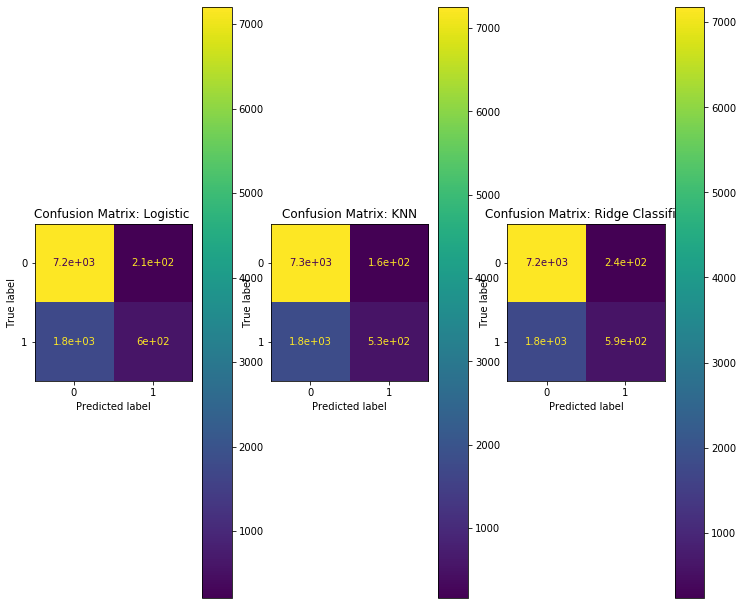

In [46]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(12, 12))
plot_confusion_matrix(logistic,X_test,y_test,ax=ax[0])
ax[0].set_title('Confusion Matrix: Logistic ')
plot_confusion_matrix(knn.best_estimator_,X_test,y_test,ax=ax[1])
ax[1].set_title('Confusion Matrix: KNN')
plot_confusion_matrix(my_model.best_estimator_,X_test,y_test,ax=ax[2])
ax[2].set_title('Confusion Matrix: Ridge Classifier')
plt.show(fig)

**Observación:** Los tres modelos predijeron aproximadamente la misma cantidad de 0 correctamente. En lo que difieren es en la cantidad que predijeron 1. Por ejemplo, en el modelo KNN se obtuvo 530 verdaderos positivos pero solo 160 falsos positivos, mientras que en el modelo Ridge se obtuvo 590 verdaderos positivos pero 240 falsos positivos.

**Classification Report**

In [47]:
print("Classification Report: Logistic")
print(classification_report(y_test, logistic.predict(X_test)))
print("Classification Report: KNN")
print(classification_report(y_test, knn.predict(X_test)))
print("Classification Report: Ridge Classifier")
print(classification_report(y_test, my_model.predict(X_test)))

Classification Report: Logistic
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      7414
           1       0.74      0.26      0.38      2355

    accuracy                           0.80      9769
   macro avg       0.77      0.61      0.63      9769
weighted avg       0.79      0.80      0.76      9769

Classification Report: KNN
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      7414
           1       0.77      0.23      0.35      2355

    accuracy                           0.80      9769
   macro avg       0.78      0.60      0.61      9769
weighted avg       0.79      0.80      0.75      9769

Classification Report: Ridge Classifier
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      7414
           1       0.72      0.25      0.37      2355

    accuracy                           0.80      9769
   macro avg       0.76      

**Curva de aprendizaje:** Replicando el ejemplo del siguiente [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py) 

In [48]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

In [49]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

**Curva de Aprendizaje**

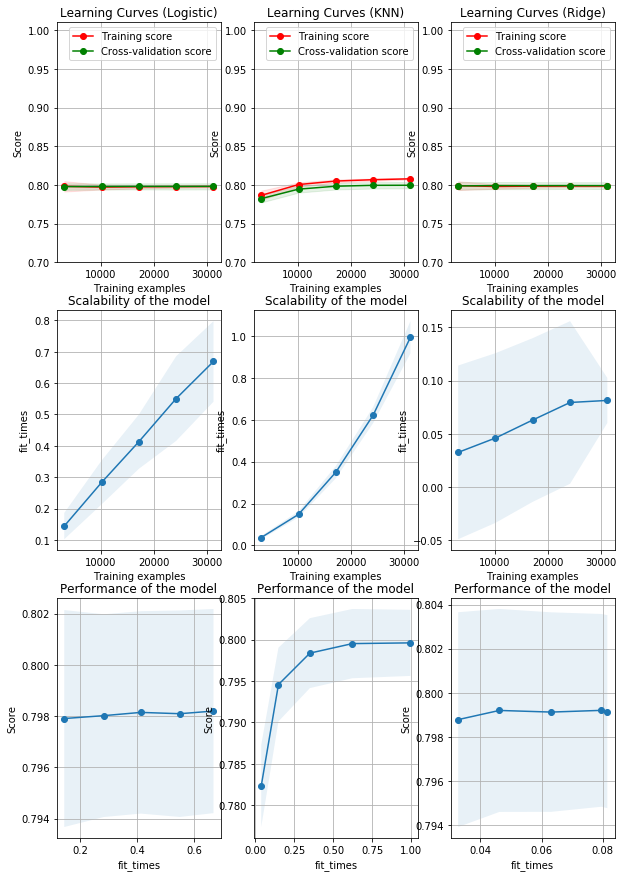

In [50]:
fig, axes = plt.subplots(3, 3, figsize=(10, 15))

title = "Learning Curves (Logistic)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = logistic
plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:,0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)
title = "Learning Curves (KNN)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = knn.best_estimator_
plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:,1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)
title = "Learning Curves (Ridge)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = my_model.best_estimator_
plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:,2], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()


<a id='conclusions'></a>

## Conclusiones

1.  Las preguntas a responder eran las siguientes:
* ¿Cuál modelo tiene mejor _score_?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?
* ¿Por qué utilizar ese _score_ y no otro?

A partir de todos los datos anteriores se puede concluir que el que tiene mejor precision score es el modelo KNN, con 0.77 usando el conjunto test.
El modelo que demora menos tiempo en austarse es el Ridge Classifier.
Aún asi, los score que se obtuvieron en cada modelo son parecidos y esto se puede observar en la primera gráfica de learning curve, los tres cercanos a 0.8. Por otro lado, el fit time del modelo Ridge es notoriamente menor al de los otros dos, no alcanza el 0.1. Es por esto que elegiría este modelo.

Se utilizó el score precision porque en el contexto de poder predecir si una persona gana mas de $50K con recursos y tiempo acotado, se valora más la precisión. Se podría decir que al utilizar el score precision se minimizan costos al momento de su aplicación. 
 
2. Recomendaciones para terceros:
Para mejorar la predicción se podría hacer una previo análisis y limpieza del data frame. La dificultad estaría en ver qué datos son realmente "datos sucios". 

3. Posible Trabajo Futuro: 
* Ver que tanto influyen las columnas capital_gain y capital-loss en la predicción.
* Realizar una predicción utilizando además los datos no numéricos o otorgarles algún valor numérico, por ejemplo a las variables profesión o sexo.
* Realizar una predicción usando otro modelo y/o otro score. 